In [59]:
import pandas as pd
import numpy as np
import random
from scipy import stats
from typing import Union
import matplotlib.pyplot as plt

In [34]:
df = pd.read_excel("Data/Chat system questionnaire(1-21).xlsx", sheet_name="Sheet1")

In [35]:
# df.groupby()

In [36]:
df

,ID,Start time,Completion time,Email,Name,Last modified time,Column,Which version of the system did you use?\n,I obtained all necessary information from the system.,I did not obtain all necessary information from the system.,...,The system offered timely responses.4,The responses were offered too slow by the system.4,I perceived the system as natural.4,I perceived the system as humanlike.4,I perceived the system as conscious.4,I perceived the system as lifelike4,I perceived the system as fake.4,I perceived the system as machinelike.4,I perceived the system as unconscious.4,I perceived the system as artificial.4
0,1,2023-10-21 12:01:39,2023-10-21 12:28:22,anonymous,NaN,NaN,I agree,Version 2,Moderately disagree,Moderately agree,...,Moderately agree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately agree,Moderately agree,Moderately agree,Moderately agree
1,2,2023-10-21 12:29:00,2023-10-21 13:00:42,anonymous,NaN,NaN,I agree,Version 3,Moderately agree,Moderately disagree,...,Strongly agree,Strongly disagree,Do not agree nor disagree,Do not agree nor disagree,Strongly agree,Moderately disagree,Do not agree nor disagree,Moderately agree,Strongly disagree,Moderately agree
2,3,2023-10-21 13:06:30,2023-10-21 14:38:45,anonymous,NaN,NaN,I agree,Version 2,Moderately agree,Moderately disagree,...,Moderately disagree,Moderately agree,Moderately agree,Do not agree nor disagree,Moderately agree,Do not agree nor disagree,Moderately disagree,Moderately agree,Moderately disagree,Moderately disagree
3,4,2023-10-21 14:39:52,2023-10-21 15:52:26,anonymous,NaN,NaN,I agree,Version 1,Do not agree nor disagree,Do not agree nor disagree,...,Moderately agree,Moderately disagree,Moderately agree,Moderately agree,Moderately agree,Do not agree nor disagree,Do not agree nor disagree,Do not agree nor disagree,Do not agree nor disagree,Do not agree nor disagree
4,5,2023-10-22 15:49:28,2023-10-22 16:10:50,anonymous,NaN,NaN,I agree,Version 1,Strongly agree,Strongly disagree,...,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
5,6,2023-10-22 17:33:16,2023-10-22 17:41:16,anonymous,NaN,NaN,I agree,Version 2,Moderately agree,Moderately disagree,...,Strongly agree,Strongly disagree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately agree,Moderately agree,Moderately agree,Moderately agree
6,7,2023-10-22 17:41:24,2023-10-22 17:58:05,anonymous,NaN,NaN,I agree,Version 4,Moderately disagree,Moderately agree,...,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
7,8,2023-10-22 17:58:30,2023-10-22 18:12:02,anonymous,NaN,NaN,I agree,Version 3,Strongly disagree,Strongly agree,...,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
8,9,2023-10-22 18:12:03,2023-10-22 18:26:41,anonymous,NaN,NaN,I agree,Version 1,Strongly agree,Strongly disagree,...,Moderately agree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately agree,Do not agree nor disagree,Moderately agree,Strongly agree,Moderately agree
9,10,2023-10-23 11:50:57,2023-10-23 12:05:23,anonymous,NaN,NaN,I agree,Version 2,Moderately disagree,Moderately agree,...,Moderately disagree,Moderately agree,Do not agree nor disagree,Do not agree nor disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Moderately agree


In [37]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Column',
       'Which version of the system did you use?\n',
       'I obtained all necessary information from the system.',
       'I did not obtain all necessary information from the system.',
       'I received correct information from the system.',
       'I received incorrect information from the system.',
       'The information given to me by the system was displayed properly.',
       'The information given to me by the system was not displayed properly.',
       'The system is dependable.', 'The system is independable.',
       'The system is flexible with my inputs.',
       'The system is rigid with my inputs.',
       'The system is easily accessible.',
       'The system is not easily accessible.',
       'The system offered timely responses.',
       'The responses were offered too slow by the system.',
       'I perceived the system as natural.',
       'I perceived the system a

# PREPROCESSING STEPS

- Seperate each of the trials from one ID (but do assign the same ID) (unsure how to do this)
  - Columns follow a semi-regularisable pattern; (no prefix, 2, 3, 4)
- Encode ordinal category
  - (strongly disagree, moderately disagree, do not agree nor disagree, moderately agree, strongly agree) -> (1,2,3,4,5)
- Normal/inverse categories must be averaged (# I obtained [...] - # I did not obtain [...])
- Calculate average for each subsequent aspect in each of the papers

In [38]:
df_trial1 = df[['ID', 'Column', 'Start time','Completion time', 'Which version of the system did you use?\n',
       'I obtained all necessary information from the system.',
       'I did not obtain all necessary information from the system.',
       'I received correct information from the system.',
       'I received incorrect information from the system.',
       'The information given to me by the system was displayed properly.',
       'The information given to me by the system was not displayed properly.',
       'The system is dependable.', 'The system is independable.',
       'The system is flexible with my inputs.',
       'The system is rigid with my inputs.',
       'The system is easily accessible.',
       'The system is not easily accessible.',
       'The system offered timely responses.',
       'The responses were offered too slow by the system.',
       'I perceived the system as natural.',
       'I perceived the system as humanlike.',
       'I perceived the system as conscious.',
       'I perceived the system as lifelike', 'I perceived the system as fake.',
       'I perceived the system as machinelike.',
       'I perceived the system as unconscious.',
       'I perceived the system as artificial.']]

In [39]:
df_trial2 = df[['ID', 'Column', 'Start time','Completion time', 'Which version of the system did you use?\n2',
       'I obtained all necessary information from the system.2',
       'I did not obtain all necessary information from the system.2',
       'I received correct information from the system.2',
       'I received incorrect information from the system.2',
       'The information given to me by the system was displayed properly.2',
       'The information given to me by the system was not displayed properly.2',
       'The system is dependable.2', 'The system is independable.2',
       'The system is flexible with my inputs.2',
       'The system is rigid with my inputs.2',
       'The system is easily accessible.2',
       'The system is not easily accessible.2',
       'The system offered timely responses.2',
       'The responses were offered too slow by the system.2',
       'I perceived the system as natural.2',
       'I perceived the system as humanlike.2',
       'I perceived the system as conscious.2',
       'I perceived the system as lifelike2',
       'I perceived the system as fake.2',
       'I perceived the system as machinelike.2',
       'I perceived the system as unconscious.2',
       'I perceived the system as artificial.2']]

In [40]:
df_trial3 = df[['ID', 'Column', 'Start time','Completion time', 'Which version of the system did you use?\n3',
       'I obtained all necessary information from the system.3',
       'I did not obtain all necessary information from the system.3',
       'I received correct information from the system.3',
       'I received incorrect information from the system.3',
       'The information given to me by the system was displayed properly.3',
       'The information given to me by the system was not displayed properly.3',
       'The system is dependable.3', 'The system is independable.3',
       'The system is flexible with my inputs.3',
       'The system is rigid with my inputs.3',
       'The system is easily accessible.3',
       'The system is not easily accessible.3',
       'The system offered timely responses.3',
       'The responses were offered too slow by the system.3',
       'I perceived the system as natural.3',
       'I perceived the system as humanlike.3',
       'I perceived the system as conscious.3',
       'I perceived the system as lifelike3',
       'I perceived the system as fake.3',
       'I perceived the system as machinelike.3',
       'I perceived the system as unconscious.3',
       'I perceived the system as artificial.3',]]

In [41]:
df_trial4 = df[['ID', 'Column', 'Start time','Completion time', 'Which version of the system did you use?\n4',
       'I obtained all necessary information from the system.4',
       'I did not obtain all necessary information from the system.4',
       'I received correct information from the system.4',
       'I received incorrect information from the system.4',
       'The information given to me by the system was displayed properly.4',
       'The information given to me by the system was not displayed properly.4',
       'The system is dependable.4', 'The system is independable.4',
       'The system is flexible with my inputs.4',
       'The system is rigid with my inputs.4',
       'The system is easily accessible.4',
       'The system is not easily accessible.4',
       'The system offered timely responses.4',
       'The responses were offered too slow by the system.4',
       'I perceived the system as natural.4',
       'I perceived the system as humanlike.4',
       'I perceived the system as conscious.4',
       'I perceived the system as lifelike4',
       'I perceived the system as fake.4',
       'I perceived the system as machinelike.4',
       'I perceived the system as unconscious.4',
       'I perceived the system as artificial.4']]

In [42]:
df_trial1

,ID,Column,Start time,Completion time,Which version of the system did you use?\n,I obtained all necessary information from the system.,I did not obtain all necessary information from the system.,I received correct information from the system.,I received incorrect information from the system.,The information given to me by the system was displayed properly.,...,The system offered timely responses.,The responses were offered too slow by the system.,I perceived the system as natural.,I perceived the system as humanlike.,I perceived the system as conscious.,I perceived the system as lifelike,I perceived the system as fake.,I perceived the system as machinelike.,I perceived the system as unconscious.,I perceived the system as artificial.
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 2,Moderately disagree,Moderately agree,Moderately agree,Moderately disagree,Moderately disagree,...,Moderately agree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately disagree,Moderately disagree,Do not agree nor disagree,Moderately agree,Moderately agree,Moderately agree
1,2,I agree,2023-10-21 12:29:00,2023-10-21 13:00:42,Version 3,Moderately agree,Moderately disagree,Moderately agree,Moderately disagree,Do not agree nor disagree,...,Moderately agree,Moderately disagree,Moderately disagree,Moderately agree,Moderately agree,Moderately disagree,Moderately disagree,Moderately agree,Moderately disagree,Moderately agree
2,3,I agree,2023-10-21 13:06:30,2023-10-21 14:38:45,Version 2,Moderately agree,Moderately disagree,Strongly agree,Strongly disagree,Strongly agree,...,Strongly agree,Strongly disagree,Do not agree nor disagree,Moderately disagree,Moderately agree,Moderately disagree,Moderately disagree,Moderately agree,Moderately disagree,Moderately agree
3,4,I agree,2023-10-21 14:39:52,2023-10-21 15:52:26,Version 1,Do not agree nor disagree,Do not agree nor disagree,Moderately agree,Moderately disagree,Moderately agree,...,Moderately agree,Moderately disagree,Moderately agree,Moderately agree,Moderately agree,Moderately agree,Moderately disagree,Do not agree nor disagree,Do not agree nor disagree,Do not agree nor disagree
4,5,I agree,2023-10-22 15:49:28,2023-10-22 16:10:50,Version 1,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Moderately agree,...,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Moderately agree,Strongly agree,Strongly agree,Strongly agree
5,6,I agree,2023-10-22 17:33:16,2023-10-22 17:41:16,Version 2,Moderately agree,Moderately disagree,Moderately agree,Moderately disagree,Do not agree nor disagree,...,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
6,7,I agree,2023-10-22 17:41:24,2023-10-22 17:58:05,Version 4,Moderately disagree,Moderately agree,Moderately disagree,Moderately agree,Do not agree nor disagree,...,Moderately agree,Moderately disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
7,8,I agree,2023-10-22 17:58:30,2023-10-22 18:12:02,Version 3,Strongly disagree,Strongly agree,Strongly disagree,Strongly agree,Moderately disagree,...,Do not agree nor disagree,Do not agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
8,9,I agree,2023-10-22 18:12:03,2023-10-22 18:26:41,Version 1,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Moderately agree,...,Strongly agree,Strongly disagree,Moderately disagree,Strongly disagree,Strongly disagree,Moderately disagree,Do not agree nor disagree,Moderately agree,Strongly agree,Moderately agree
9,10,I agree,2023-10-23 11:50:57,2023-10-23 12:05:23,Version 2,Moderately disagree,Moderately agree,Do not agree nor disagree,Do not agree nor disagree,Moderately agree,...,Moderately a

In [43]:
def likert_decoder(likert: str) -> Union[int, str]:
    dct = dict({"Strongly disagree": 1, "Moderately disagree": 2, "Do not agree nor disagree": 3, "Moderately agree": 4, "Strongly agree": 5})
    if likert in dct.keys():
        return dct[likert]
    else:
        return likert  # do not mutate unrelated strings
    
def likert_wrapper(series: pd.Series) -> pd.Series:
    series_copy = series.copy()
    series_copy = series_copy.apply(likert_decoder)
    return series_copy

In [44]:
df_trial1 = df_trial1.apply(likert_wrapper, axis=0)
df_trial2 = df_trial2.apply(likert_wrapper, axis=0)
df_trial3 = df_trial3.apply(likert_wrapper, axis=0)
df_trial4 = df_trial4.apply(likert_wrapper, axis=0)

In [45]:
# dict(zip(df_trial2.columns, df_trial1.columns))

In [46]:
df_trial2 = df_trial2.rename(columns=dict(zip(df_trial2.columns, df_trial1.columns)))
df_trial3 = df_trial3.rename(columns=dict(zip(df_trial3.columns, df_trial1.columns)))
df_trial4 = df_trial4.rename(columns=dict(zip(df_trial4.columns, df_trial1.columns)))


In [47]:
df_trials = pd.concat([df_trial1, df_trial2, df_trial3, df_trial4])

In [48]:
df_trials

,ID,Column,Start time,Completion time,Which version of the system did you use?\n,I obtained all necessary information from the system.,I did not obtain all necessary information from the system.,I received correct information from the system.,I received incorrect information from the system.,The information given to me by the system was displayed properly.,...,The system offered timely responses.,The responses were offered too slow by the system.,I perceived the system as natural.,I perceived the system as humanlike.,I perceived the system as conscious.,I perceived the system as lifelike,I perceived the system as fake.,I perceived the system as machinelike.,I perceived the system as unconscious.,I perceived the system as artificial.
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 2,2,4,4,2,2,...,4,2,2,2,2,2,3,4,4,4
1,2,I agree,2023-10-21 12:29:00,2023-10-21 13:00:42,Version 3,4,2,4,2,3,...,4,2,2,4,4,2,2,4,2,4
2,3,I agree,2023-10-21 13:06:30,2023-10-21 14:38:45,Version 2,4,2,5,1,5,...,5,1,3,2,4,2,2,4,2,4
3,4,I agree,2023-10-21 14:39:52,2023-10-21 15:52:26,Version 1,3,3,4,2,4,...,4,2,4,4,4,4,2,3,3,3
4,5,I agree,2023-10-22 15:49:28,2023-10-22 16:10:50,Version 1,5,1,5,1,4,...,1,5,1,1,1,1,4,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,17,I agree,2023-10-26 09:17:14,2023-10-26 09:26:27,Version 4,4,2,4,2,4,...,4,2,2,2,2,2,4,4,4,4
17,18,I agree,2023-10-26 11:00:46,2023-10-26 11:20:56,Version 4,4,2,4,2,4,...,4,2,2,2,3,2,4,4,3,4
18,19,I agree,2023-10-26 11:25:30,2023-10-26 11:59:35,Version 1,2,4,2,4,4,...,4,2,3,2,2,2,4,4,3,4
19,20,I agree,2023-10-26 12:17:57,2023-10-26 12:47:25,Version 4,3,2,2,4,4,...,4,2,2,2,3,2,3,5,4,4


In [49]:
df_trials = df_trials.sort_index()
df_trials = df_trials.sort_values(["ID", "Which version of the system did you use?\n"])

In [50]:
df_trials

,ID,Column,Start time,Completion time,Which version of the system did you use?\n,I obtained all necessary information from the system.,I did not obtain all necessary information from the system.,I received correct information from the system.,I received incorrect information from the system.,The information given to me by the system was displayed properly.,...,The system offered timely responses.,The responses were offered too slow by the system.,I perceived the system as natural.,I perceived the system as humanlike.,I perceived the system as conscious.,I perceived the system as lifelike,I perceived the system as fake.,I perceived the system as machinelike.,I perceived the system as unconscious.,I perceived the system as artificial.
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 1,4,2,4,2,4,...,4,2,2,2,2,2,4,4,4,4
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 2,2,4,4,2,2,...,4,2,2,2,2,2,3,4,4,4
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 3,2,4,2,4,2,...,4,2,2,2,2,2,4,4,4,4
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 4,2,4,2,4,4,...,4,2,2,2,2,2,4,4,4,4
1,2,I agree,2023-10-21 12:29:00,2023-10-21 13:00:42,Version 1,5,1,5,1,5,...,2,4,2,2,4,3,3,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,I agree,2023-10-26 12:17:57,2023-10-26 12:47:25,Version 4,3,2,2,4,4,...,4,2,2,2,3,2,3,5,4,4
20,21,I agree,2023-10-26 13:27:33,2023-10-26 13:55:20,Version 1,2,4,1,4,4,...,4,2,1,2,2,1,4,5,4,3
20,21,I agree,2023-10-26 13:27:33,2023-10-26 13:55:20,Version 2,4,2,5,2,4,...,4,2,2,2,4,2,4,4,5,4
20,21,I agree,2023-10-26 13:27:33,2023-10-26 13:55:20,Version 3,2,4,1,4,4,...,2,4,3,2,3,1,3,5,4,4


In [51]:
df_trials.columns

Index(['ID', 'Column', 'Start time', 'Completion time',
       'Which version of the system did you use?\n',
       'I obtained all necessary information from the system.',
       'I did not obtain all necessary information from the system.',
       'I received correct information from the system.',
       'I received incorrect information from the system.',
       'The information given to me by the system was displayed properly.',
       'The information given to me by the system was not displayed properly.',
       'The system is dependable.', 'The system is independable.',
       'The system is flexible with my inputs.',
       'The system is rigid with my inputs.',
       'The system is easily accessible.',
       'The system is not easily accessible.',
       'The system offered timely responses.',
       'The responses were offered too slow by the system.',
       'I perceived the system as natural.',
       'I perceived the system as humanlike.',
       'I perceived the system 

In [52]:
def variable_calc(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()
    # columns containing necessary info
    Q_complete = 'I obtained all necessary information from the system.'
    QI_complete = 'I did not obtain all necessary information from the system.'  # Inverse
    Q_accuracy = 'I received correct information from the system.'
    QI_accuracy = 'I received incorrect information from the system.'
    Q_format = 'The information given to me by the system was displayed properly.'
    QI_format = 'The information given to me by the system was not displayed properly.'
    Q_reliability = 'The system is dependable.'
    QI_reliability = 'The system is independable.'
    Q_flexibility = 'The system is flexible with my inputs.'
    QI_flexibility = 'The system is rigid with my inputs.'
    Q_accessibility = 'The system is easily accessible.'
    QI_accessibility = 'The system is not easily accessible.'
    Q_timeliness = 'The system offered timely responses.'
    QI_timeliness = 'The responses were offered too slow by the system.'
    Q_natural = 'I perceived the system as natural.'
    QI_natural = 'I perceived the system as fake.'
    Q_humanlike = 'I perceived the system as humanlike.'
    QI_humanlike = 'I perceived the system as machinelike.'
    Q_conscious = 'I perceived the system as conscious.'
    QI_conscious = 'I perceived the system as unconscious.'
    Q_lifelike = 'I perceived the system as lifelike'
    QI_lifelike = 'I perceived the system as artificial.'
    # Initial var extraction (normal+inverse)
    df_copy["Completeness"] = (df_trials[Q_complete] + (6 - df_trials[QI_complete])) / 2
    df_copy["Accuracy"] = (df_trials[Q_accuracy] + (6 - df_trials[QI_accuracy])) / 2
    df_copy["Format"] = (df_trials[Q_format] + (6 - df_trials[QI_format])) / 2
    df_copy["Reliability"] = (df_trials[Q_reliability] + (6 - df_trials[QI_reliability])) / 2
    df_copy["Flexibility"] = (df_trials[Q_flexibility] + (6 - df_trials[QI_flexibility])) / 2
    df_copy["Accessibility"] = (df_trials[Q_accessibility] + (6 - df_trials[QI_accessibility])) / 2
    df_copy["Timeliness"] = (df_trials[Q_timeliness] + (6 - df_trials[QI_timeliness])) / 2
    df_copy["Natural"] = (df_trials[Q_natural] + (6 - df_trials[QI_natural])) / 2
    df_copy["Humanlike"] = (df_trials[Q_humanlike] + (6 - df_trials[QI_humanlike])) / 2
    df_copy["Conscious"] = (df_trials[Q_conscious] + (6 - df_trials[QI_conscious])) / 2
    df_copy["Lifelike"] = (df_trials[Q_lifelike] + (6 - df_trials[QI_lifelike])) / 2
    # Dependent variable calculation
    # User satisfaction (aka usefulness/ease of use)
    df_copy["Information Quality"] = (df_copy["Completeness"] + df_copy["Accuracy"] + df_copy["Format"]) / 3
    df_copy["System Quality"] = (df_copy["Reliability"] + df_copy["Flexibility"] + df_copy["Accessibility"] + df_copy["Timeliness"]) / 4
    df_copy["Information satisfaction"] = (df_copy["System Quality"] + df_copy["Information Quality"]) / 2
    df_copy["Usefulness"] = (df_copy["Information satisfaction"] + df_copy["System Quality"]) / 2
    df_copy["Ease of use"] = df_copy["System Quality"]  # Never changes according to the paper
    # Anthropomorphism
    df_copy["Anthropomorphism"] = (df_copy["Natural"] + df_copy["Humanlike"] + df_copy["Conscious"] + df_copy["Lifelike"]) / 4
    # Done
    return df_copy


In [53]:
df_trials_vars = variable_calc(df_trials)

In [54]:
df_trials_vars

,ID,Column,Start time,Completion time,Which version of the system did you use?\n,I obtained all necessary information from the system.,I did not obtain all necessary information from the system.,I received correct information from the system.,I received incorrect information from the system.,The information given to me by the system was displayed properly.,...,Natural,Humanlike,Conscious,Lifelike,Information Quality,System Quality,Information satisfaction,Usefulness,Ease of use,Anthropomorphism
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 1,4,2,4,2,4,...,2.0,2.0,2.0,2.0,4.000000,3.250,3.625000,3.437500,3.250,2.000
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 2,2,4,4,2,2,...,2.5,2.0,2.0,2.0,2.666667,3.250,2.958333,3.104167,3.250,2.125
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 3,2,4,2,4,2,...,2.0,2.0,2.0,2.0,2.000000,2.750,2.375000,2.562500,2.750,2.000
0,1,I agree,2023-10-21 12:01:39,2023-10-21 12:28:22,Version 4,2,4,2,4,4,...,2.0,2.0,2.0,2.0,2.666667,2.750,2.708333,2.729167,2.750,2.000
1,2,I agree,2023-10-21 12:29:00,2023-10-21 13:00:42,Version 1,5,1,5,1,5,...,2.5,1.5,4.0,2.0,5.000000,3.750,4.375000,4.062500,3.750,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,I agree,2023-10-26 12:17:57,2023-10-26 12:47:25,Version 4,3,2,2,4,4,...,2.5,1.5,2.5,2.0,3.166667,3.125,3.145833,3.135417,3.125,2.125
20,21,I agree,2023-10-26 13:27:33,2023-10-26 13:55:20,Version 1,2,4,1,4,4,...,1.5,1.5,2.0,2.0,2.500000,3.375,2.937500,3.156250,3.375,1.750
20,21,I agree,2023-10-26 13:27:33,2023-10-26 13:55:20,Version 2,4,2,5,2,4,...,2.0,2.0,2.5,2.0,4.166667,3.750,3.958333,3.854167,3.750,2.125
20,21,I agree,2023-10-26 13:27:33,2023-10-26 13:55:20,Version 3,2,4,1,4,4,...,3.0,1.5,2.5,1.5,2.500000,2.500,2.500000,2.500000,2.500,2.125


In [55]:
# Create some sample data
V1 = df_trials_vars[ df_trials_vars['Which version of the system did you use?\n']=='Version 1']
V2 = df_trials_vars[ df_trials_vars['Which version of the system did you use?\n']=='Version 2']
V3 = df_trials_vars[ df_trials_vars['Which version of the system did you use?\n']=='Version 3']
V4 = df_trials_vars[ df_trials_vars['Which version of the system did you use?\n']=='Version 4']


In [56]:
v1_ease = np.mean(V1['Ease of use'])
v1_useful = np.mean(V1['Usefulness'])
v1_anthro = np.mean(V1['Anthropomorphism'])

v2_ease = np.mean(V2['Ease of use'])
v2_useful = np.mean(V2['Usefulness'])
v2_anthro = np.mean(V2['Anthropomorphism'])

v3_ease = np.mean(V3['Ease of use'])
v3_useful = np.mean(V3['Usefulness'])
v3_anthro = np.mean(V3['Anthropomorphism'])

v4_ease = np.mean(V4['Ease of use'])
v4_useful = np.mean(V4['Usefulness'])
v4_anthro = np.mean(V4['Anthropomorphism'])




In [57]:
# testing for ingo, no need to run this cell

print(int(df_trials_vars.shape[0]/4))

print(*range(int(df_trials_vars.shape[0]/4)))

person = df_trials_vars[ df_trials_vars['ID']==5]

print(person)

21
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
   ID   Column          Start time     Completion time  \
4   5  I agree 2023-10-22 15:49:28 2023-10-22 16:10:50   
4   5  I agree 2023-10-22 15:49:28 2023-10-22 16:10:50   
4   5  I agree 2023-10-22 15:49:28 2023-10-22 16:10:50   
4   5  I agree 2023-10-22 15:49:28 2023-10-22 16:10:50   

  Which version of the system did you use?\n  \
4                                  Version 1   
4                                  Version 2   
4                                  Version 3   
4                                  Version 4   

   I obtained all necessary information from the system.  \
4                                                  5       
4                                                  5       
4                                                  1       
4                                                  1       

   I did not obtain all necessary information from the system.  \
4                                            

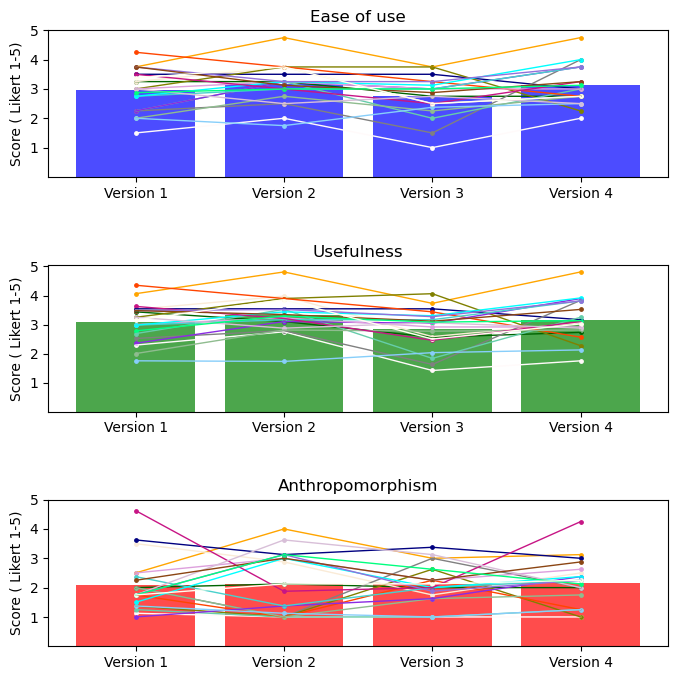

In [58]:
ease_data = np.array([v1_ease, v2_ease, v3_ease, v4_ease])
usefulness_data = np.array([v1_useful, v2_useful, v3_useful, v4_useful])
anthro_data = np.array([v1_anthro, v2_anthro, v3_anthro, v4_anthro])

categories = ['Version 1', 'Version 2', 'Version 3', 'Version 4']

# Create a figure with three subplots arranged vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

# Plot the data on each subplot
ax1.bar(categories, ease_data, color='blue', alpha=0.7, label='Data 1')
ax2.bar(categories, usefulness_data, color='green', alpha=0.7, label='Data 2')
ax3.bar(categories, anthro_data, color='red', alpha=0.7, label='Data 3')

# Customize each subplot
ax1.set_title('Ease of use')
ax2.set_title('Usefulness')
ax3.set_title('Anthropomorphism')

# Add some spacing between subplots
plt.subplots_adjust(hspace=0.6)

num_of_trials = df_trials_vars.shape[0]
num_of_participants = int(np.floor(num_of_trials / 4))


import matplotlib.colors as mcolors
named_colors = list(mcolors.CSS4_COLORS.values())
random.shuffle(named_colors)
    
linewidth = 1    
dot_size = 6

# ease of use
for people in range(num_of_participants):
    color = named_colors[people]
    people += 1 # because the excel ID begins at 1
    
    person = df_trials_vars[ df_trials_vars['ID']==people]
    x_pos = [0,1,2,3]
    
    ax1.plot(x_pos,person['Ease of use'],color=color, linewidth=linewidth)
    ax1.scatter(x_pos,person['Ease of use'],color=color,s=dot_size)

    # Usefulness
    ax2.plot(x_pos,person['Usefulness'],color=color, linewidth=linewidth)
    ax2.scatter(x_pos,person['Usefulness'],color=color,s=dot_size)


    # Anthropomorphism
    ax3.plot(x_pos,person['Anthropomorphism'],color=color, linewidth=linewidth)
    ax3.scatter(x_pos,person['Anthropomorphism'],color=color,s=dot_size)

# Display the plot

# Add legends
#ax1.legend()
#ax2.legend()
#ax3.legend()

ax1.set_ylabel("Score ( Likert 1-5)")
ax2.set_ylabel("Score ( Likert 1-5)")
ax3.set_ylabel("Score ( Likert 1-5)")

ax1.set_yticks(np.arange(1, 6, 1))
ax2.set_yticks(np.arange(1, 6, 1))
ax3.set_yticks(np.arange(1, 6, 1))
plt.savefig("custom_plot.png")
plt.show()

[3.4375,
 4.0625,
 3.520833333333333,
 3.5416666666666665,
 2.291666666666667,
 2.5208333333333335,
 3.25,
 2.6875,
 4.354166666666667,
 2.0,
 2.3541666666666665,
 3.0,
 1.75,
 2.9791666666666665,
 2.9791666666666665,
 3.625,
 3.25,
 3.4791666666666665,
 3.4791666666666665,
 2.78125,
 3.15625]

In [64]:
stats.kruskal(list(V1["Usefulness"]), list(V2["Usefulness"]), list(V3["Usefulness"]), list(V4["Usefulness"]))

KruskalResult(statistic=5.340288198338382, pvalue=0.14850941018198288)

In [65]:
stats.kruskal(list(V1["Ease of use"]), list(V2["Ease of use"]), list(V3["Ease of use"]), list(V4["Ease of use"]))

KruskalResult(statistic=4.160827469730186, pvalue=0.24461317824093654)

In [66]:
stats.kruskal(list(V1["Anthropomorphism"]), list(V2["Anthropomorphism"]), list(V3["Anthropomorphism"]), list(V4["Anthropomorphism"]))

KruskalResult(statistic=0.48715346288357797, pvalue=0.9217045384780984)

In [74]:
# version 1: caps: yes, delay: yes (3)
# version 2: caps: yes, delay: no (0)
# version 3: caps: no, delay: yes (3)
# version 4: caps: no, delay no (0)

# therefore, capsY = V1 + v2
# therefore, capsN = V3 + V4
# therefore, delayY = V1 + V3
# therefore, delayN = V2 + V4

capsY = pd.concat([V1, V2])[["Usefulness", "Ease of use", "Anthropomorphism"]].describe()
print("caps: yes")
print(capsY)
capsN = pd.concat([V3, V4])[["Usefulness", "Ease of use", "Anthropomorphism"]].describe()
print("caps: no")
print(capsN)
delayY = pd.concat([V1, V3])[["Usefulness", "Ease of use", "Anthropomorphism"]].describe()
print("delay: yes")
print(delayY)
delayN = pd.concat([V2, V4])[["Usefulness", "Ease of use", "Anthropomorphism"]].describe()
print("delay: no")
print(delayN)

caps: yes
       Usefulness  Ease of use  Anthropomorphism
count   42.000000    42.000000         42.000000
mean     3.199157     3.056548          2.110119
std      0.636984     0.681418          0.955648
min      1.729167     1.500000          1.000000
25%      2.828125     2.750000          1.375000
50%      3.239583     3.187500          1.937500
75%      3.520833     3.500000          2.968750
max      4.812500     4.750000          4.625000
caps: no
       Usefulness  Ease of use  Anthropomorphism
count   42.000000    42.000000         42.000000
mean     2.997520     2.934524          2.142857
std      0.707940     0.693083          0.726025
min      1.416667     1.000000          1.000000
25%      2.567708     2.500000          1.750000
50%      3.062500     3.000000          2.125000
75%      3.403646     3.250000          2.593750
max      4.812500     4.750000          4.250000
delay: yes
       Usefulness  Ease of use  Anthropomorphism
count   42.000000    42.000000         

In [77]:
# capsYdelayY = V1
# capsYdelayN = V2
# capsNdelayY = V3
# capsNdelayN = V4
print("capsYdelayY")
print(V1[["Usefulness", "Ease of use", "Anthropomorphism"]].describe())
print("capsYdelayN")
print(V2[["Usefulness", "Ease of use", "Anthropomorphism"]].describe())
print("capsNdelayY")
print(V3[["Usefulness", "Ease of use", "Anthropomorphism"]].describe())
print("capsNdelayN")
print(V4[["Usefulness", "Ease of use", "Anthropomorphism"]].describe())

capsYdelayY
       Usefulness  Ease of use  Anthropomorphism
count   21.000000    21.000000         21.000000
mean     3.071429     2.952381          2.083333
std      0.650698     0.708736          0.894718
min      1.750000     1.500000          1.000000
25%      2.687500     2.250000          1.500000
50%      3.156250     3.000000          1.750000
75%      3.479167     3.500000          2.375000
max      4.354167     4.250000          4.625000
capsYdelayN
       Usefulness  Ease of use  Anthropomorphism
count   21.000000    21.000000         21.000000
mean     3.326885     3.160714          2.136905
std      0.611650     0.653288          1.034487
min      1.729167     1.750000          1.000000
25%      3.104167     3.000000          1.000000
50%      3.291667     3.250000          2.125000
75%      3.541667     3.500000          3.000000
max      4.812500     4.750000          4.000000
capsNdelayY
       Usefulness  Ease of use  Anthropomorphism
count   21.000000    21.000000   